In [125]:
import pandas as pd
import streamlit as st
import matplotlib.pyplot as plt
df = pd.read_csv('online_fraud.csv')
# df = df.sample(6666) 
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.00,0.00,0,0
1,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.00,0.00,1,0
2,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.00,0.00,1,0
3,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.00,0.00,0,0
4,1,PAYMENT,7817.71,C90045638,53860.0,46042.29,M573487274,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
29994,8,CASH_OUT,36964.29,C2059286523,0.0,0.00,C288106800,110928.39,147892.68,0,0
29995,8,CASH_OUT,125964.25,C1001070092,0.0,0.00,C33524623,1333278.75,1459243.00,0,0
29996,8,CASH_OUT,99100.57,C1533110893,0.0,0.00,C1263845074,563428.62,2486396.91,0,0
29997,8,CASH_OUT,160444.63,C632621706,0.0,0.00,C1178471274,1858545.34,2096994.78,0,0


In [126]:
df.isFraud
df = df.sort_values(by = 'isFraud', ignore_index= 'True',ascending= False)
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,CASH_OUT,20128.00,C1118430673,20128.00,0.00,C339924917,6268.00,12145.85,1,0
1,4,CASH_OUT,13707.11,C556223230,13707.11,0.00,C2094777811,0.00,13707.11,1,0
2,7,TRANSFER,5460002.91,C666654362,5460002.91,0.00,C1726301214,0.00,0.00,1,0
3,6,TRANSFER,13704.00,C1735554279,13704.00,0.00,C12793273,0.00,1658746.09,1,0
4,3,CASH_OUT,10539.37,C1984954272,10539.37,0.00,C124540047,0.00,10539.37,1,0
...,...,...,...,...,...,...,...,...,...,...,...
29994,7,TRANSFER,472352.26,C841178080,6596.17,0.00,C11003494,15026180.08,15487289.90,0,0
29995,7,PAYMENT,3952.83,C1092326292,10549.00,6596.17,M1100398651,0.00,0.00,0,0
29996,7,PAYMENT,23923.09,C242197804,14038.00,0.00,M787647307,0.00,0.00,0,0
29997,7,PAYMENT,15378.78,C501111562,587.98,0.00,M1547405018,0.00,0.00,0,0


In [127]:
df.isFraud.value_counts(normalize=True).apply(lambda x: format(x, '.2%'))

0    99.72%
1     0.28%
Name: isFraud, dtype: object

In [128]:
df.isFraud

0        1
1        1
2        1
3        1
4        1
        ..
29994    0
29995    0
29996    0
29997    0
29998    0
Name: isFraud, Length: 29999, dtype: int64

In [129]:
c = df.groupby('isFraud').sum()
c['number'] = df.isFraud.value_counts()
c

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud,number
isFraud,,,,,,,,
0,197409,4.079011e+09,2.593984e+10,2.648641e+10,2.588349e+10,3.575375e+10,0,29915
1,378,4.942953e+07,5.055586e+07,2.930418e+06,1.753597e+07,5.855158e+07,0,84


In [130]:
# 事物类型

print(df.type.value_counts())

PAYMENT     14536
CASH_OUT     6529
CASH_IN      5530
TRANSFER     2874
DEBIT         530
Name: type, dtype: int64


<AxesSubplot:>

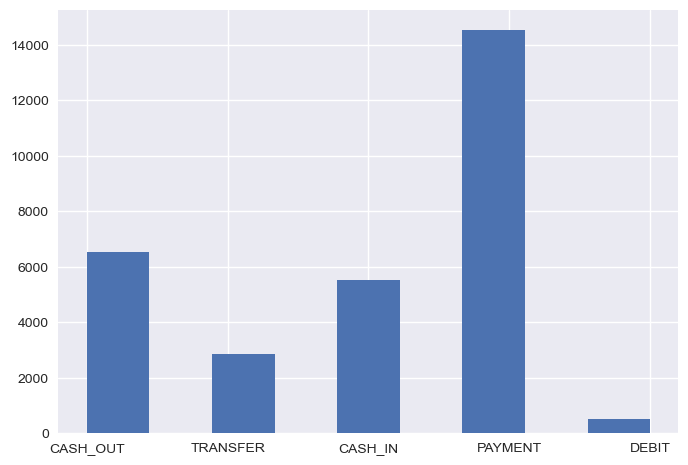

In [131]:
#做一个有关支付方式的柱形图：
plt.style.use('seaborn')
df.type.hist(bins=9)


Text(0, 0.5, 'Ticket Price')

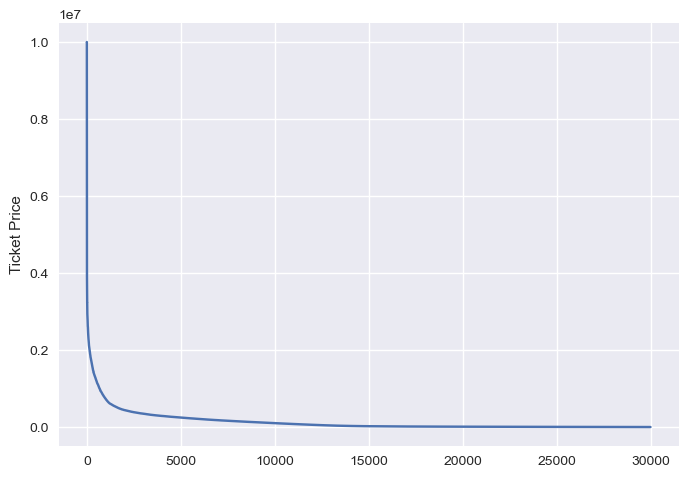

In [132]:
ticket_price = df.sort_values(by = 'amount', ignore_index= 'True',ascending= False)#ignore_index
ticket_price.amount.plot().set_ylabel('Ticket Price')

<AxesSubplot:>

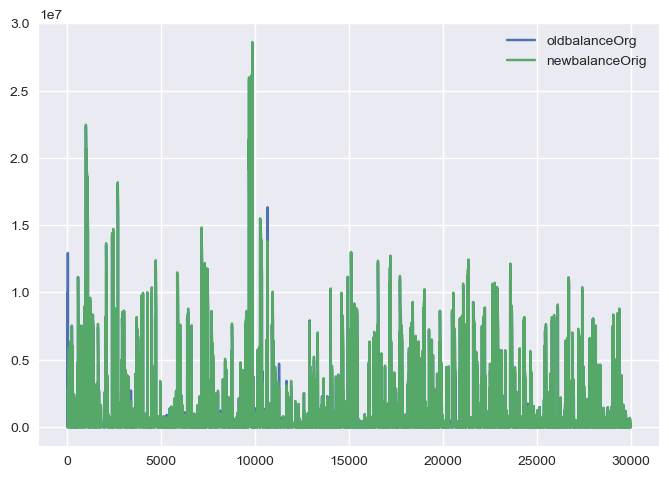

In [133]:
df[['oldbalanceOrg', 'newbalanceOrig']].plot()

In [145]:
data = df[df.isFraud == 1]
data

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,CASH_OUT,20128.00,C1118430673,20128.00,0.0,C339924917,6268.0,12145.85,1,0
1,4,CASH_OUT,13707.11,C556223230,13707.11,0.0,C2094777811,0.0,13707.11,1,0
2,7,TRANSFER,5460002.91,C666654362,5460002.91,0.0,C1726301214,0.0,0.00,1,0
3,6,TRANSFER,13704.00,C1735554279,13704.00,0.0,C12793273,0.0,1658746.09,1,0
4,3,CASH_OUT,10539.37,C1984954272,10539.37,0.0,C124540047,0.0,10539.37,1,0
...,...,...,...,...,...,...,...,...,...,...,...
79,5,CASH_OUT,120074.73,C1174000532,120074.73,0.0,C410033330,0.0,120074.73,1,0
80,8,CASH_OUT,181728.11,C2102265902,0.00,0.0,C789014007,11397.0,184477.77,1,0
81,2,TRANSFER,14949.84,C140702728,14949.84,0.0,C634210724,0.0,0.00,1,0
82,6,TRANSFER,216422.00,C666642000,216422.00,0.0,C1315078366,0.0,0.00,1,0


In [144]:
import plotly.express as px
type = data["type"].value_counts()
transactions = type.index
quantity = type.values
figure = px.pie(data, values=quantity, names=transactions, hole = 0.5, title="Distribution of Transaction Type")
figure.show()

In [146]:
correlation = data.corr()
correlation

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
step,1.000000,0.000749,-0.009678,-0.023529,0.016298,-0.037400,NaN,NaN
amount,0.000749,1.000000,0.988957,0.590037,0.005881,0.427308,NaN,NaN
oldbalanceOrg,-0.009678,0.988957,1.000000,0.691211,0.004271,0.367244,NaN,NaN
newbalanceOrig,-0.023529,0.590037,0.691211,1.000000,-0.015708,-0.032608,NaN,NaN
oldbalanceDest,0.016298,0.005881,0.004271,-0.015708,1.000000,0.637244,NaN,NaN
newbalanceDest,-0.037400,0.427308,0.367244,-0.032608,0.637244,1.000000,NaN,NaN
isFraud,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
isFlaggedFraud,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
